<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/Back_to_Basics_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
## Understanding linear regression, the math, NumPy and PyTorch implementation 

# y = XW + b (linear model)

# where y is the prediction, X is the input(s), W is the weight and b is the bias

In [8]:
# the objective is to use the input X to predict the output y using a linear model.
# the model will be a line of best fit that minimises the distance between the predicted (model output) and the target (ground truth) values 

# Training data (X, y) is used to train the model and learn the weights W using gradient descent.

In [9]:
# Generating the data

# - for this exercise, we will generate some dummy data to apply linear regression on. 
# - it will create roughly linear data (y = 3.5x + noise)
# - the random noise will be added to create realistic data that doesn't perfectly align in a line.
# - there will be slight variance since we added some noise 

In [18]:
# Importing the necessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
print ("Libraries successfully imported")

Libraries successfully imported


In [19]:
# set seed for reproducibility 
SEED = 1234
NUM_SAMPLES = 50

np.random.seed(SEED)

In [20]:
# Generating dummy data

def generate_data(num_samples):
  """Generate dummy data for linear regression"""
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,20,size = num_samples)
  y = 3.5 * X + random_noise # add some noise
  return X, y

In [21]:
# Generate random (linear) data

X, y = generate_data(num_samples = NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [23]:
# Loading data into the Pandas DataFrame

df = pd.DataFrame(data, columns = ["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


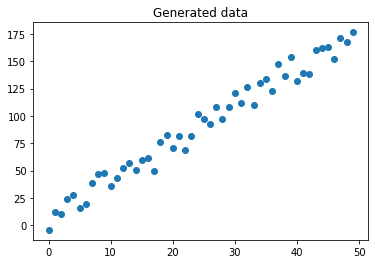

In [24]:
# Making a scatter plot 
plt.title("Generated data")
plt.scatter(x = df["X"], y = df["y"])
plt.show()

In [25]:
## Numpy implementation 
# - Splitting the data 
# -- Here, we will randomly split the dataset into three sets: train, validation and test data
# train - used to train the model 
# val - used to validate models performance during training 
# test - used to evaluate the fully trained model

In [26]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [28]:
# Shuffling the data 
# be care not to shuffle X and y separately because then the inputs will not correspond to the outputs

indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

In [29]:
# Split indices 

train_start = 0
train_end = int(0.7 * NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE + VAL_SIZE) * NUM_SAMPLES)
test_start = val_end

In [31]:
# Splitting data 

X_train = X[train_start:train_end]
y_train = y[train_start:train_end]

X_val = X[val_start:val_end]
y_val = y[val_start:val_end]

X_test = X[test_start:]
y_test = y[test_start:]

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_val: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [32]:
# Standardising the data
# - this implies making it have a zero mean and unit magnitude such that the magnitude of a specific feature will not affect how the model learns its weights.

# Using the formular (standardised value = (inputs - mean)/standard deviation)

def standardise_data(data, mean, std):
  return(data - mean)/std

In [34]:
# Determining the means and the stds 
# We need to treat the validation and test datasets as it they are hidden 
# - So we only use the train set to determing the mean and std to avoid biasing the training process

X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

print (X_mean, X_std, y_mean, y_std)

23.742857142857144 14.263525625360167 90.0159460487698 49.02826239495899


In [35]:
# Standardise 

X_train = standardise_data(X_train, X_mean, X_std)
y_train = standardise_data(y_train, y_mean, y_std)

X_val = standardise_data(X_val, X_mean, X_std)
y_val = standardise_data(y_val, y_mean, y_std)

X_test = standardise_data(X_test, X_mean, X_std)
y_test = standardise_data(y_test, y_mean, y_std)

In [37]:
# Check (mean should be approx 0 and std should be approx 1)

print (f"mean: {np.mean(X_test, axis = 0)[0]:.1f}, std: {np.std(X_test, axis = 0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis = 0)[0]:.1f}, std: {np.std(y_test, axis = 0)[0]:.1f}")

mean: 0.9, std: 0.5
mean: 0.8, std: 0.4


In [38]:
# Weights 
# the goal is to learn a linear model that predicts y given X using weights W and bias b

# Step 1 - Randomly initialise the models weights W

INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [39]:
# Initialise random weights 

W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))

print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [40]:
# Model 
# Step 2 - feed inputs X into the model to receive predictions y

# Forward pass [NX1] * [1X1] = [NX1]

y_pred = np.dot(X_train, W) + b

print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


In [41]:
# Loss 
# Step 3 -  compare predictions y wiht the actual target values y using the objective (cost) function to determne the loss J.
# - A common objective function for linear regression is the mean squarred error (MSE)
# - this function calculates the difference between the predicted and the target values and squares it

N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred) ** 2)

print (f"loss: {loss:.2f}")

loss: 0.98


In [43]:
# Gradients 
# Step 4 - calculate the gradient of the loss w.r.t the models weights 
# - the gradient is a derivative or the rate of change of a function. 
# - it is a vector that points in the direction of greatest increase of a function. 
# - For e.g, the gradient of our loss function (J) w.r.t the weights (W) will inform how to change W so we can maximise J
# - However, we want to minimise the loss so we subtract the gradient from W

# Backpropagation 

dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

print (dW, db)

-1.9551728358043143 -7.612957883143931e-17


In [44]:
# Update weights 
# Step 5 - Update the weights using a small learning rate alpha*
# - the learning rate is a way to control how much we update the weights by. 
# - choosing a small learning rate means a longer time for the model to train 
# - choosing a large learning rate could lead to an overshoot and the traing may never converge
# the specific learning rate depends on the data and the type of model being used.
# typically, learning rate ranges around 1e-8 to 1e-1

LEARNING_RATE = 1e-1

In [45]:
# Update weight -- 
W += - LEARNING_RATE * dW
b += - LEARNING_RATE * db

In [46]:
# Training 
# Step 6 - Repeat steps 2 - 5 to minimise the loss and train the model

NUM_EPOCHS = 100

In [50]:
# Initialise random weights 

W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,))

# Training Loop

for epoch_num in range (NUM_EPOCHS):

  # Forward pass [NX1] * [1X1] = [NX1]
  y_pred = np.dot(X_train, W) + b

  # Loss
  loss = (1/len(y_train)) * np.sum((y_train - y_pred) ** 2)

  # Show progress 
  if epoch_num%10 == 0:
    print (f"Epoch: {epoch_num}, loss:{loss:.3f}")

  # Backpropagation 
  dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  db = -(2/N) * np.sum((y_train - y_pred) * 1)

  # Update weights 
  W += - LEARNING_RATE * dW
  b += - LEARNING_RATE * db

Epoch: 0, loss:0.996
Epoch: 10, loss:0.035
Epoch: 20, loss:0.024
Epoch: 30, loss:0.024
Epoch: 40, loss:0.024
Epoch: 50, loss:0.024
Epoch: 60, loss:0.024
Epoch: 70, loss:0.024
Epoch: 80, loss:0.024
Epoch: 90, loss:0.024


In [55]:
# Evaluation 
# - Here we explore how well the trained model will perform on the test dataset
# - this will be the best measure on how well the model will perform in the real world as our test datset is close to unseen data

# Predictions
 
pred_train = W * X_train + b
pred_test = W * X_test + b 

print (pred_train, pred_test)

[[ 0.36412141]
 [-0.67481196]
 [ 0.08707251]
 [ 1.61084146]
 [-1.09038531]
 [ 0.50264586]
 [ 1.74936591]
 [-0.74407419]
 [ 1.26453033]
 [-0.88259864]
 [-0.46702529]
 [-0.25923861]
 [-1.50595866]
 [ 0.01781029]
 [ 1.68010368]
 [-0.81333641]
 [ 0.84895699]
 [ 0.64117031]
 [-0.12071416]
 [ 0.77969476]
 [-0.18997639]
 [-1.36743421]
 [-0.53628751]
 [ 1.47231701]
 [-0.60554974]
 [-0.95186086]
 [ 0.91821921]
 [-1.02112309]
 [ 1.40305478]
 [-0.32850084]
 [-1.57522089]
 [-0.39776306]
 [ 1.05674366]
 [ 0.57190809]
 [-1.43669644]] [[1.54157923]
 [1.19526811]
 [0.43338364]
 [0.22559696]
 [0.29485919]
 [1.12600588]
 [1.33379256]
 [0.98748143]]


In [56]:
# Train and test MSE

train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)

print(f"train_MSE: {train_mse: .2f}, test_MSE: {test_mse:.2f}")

train_MSE:  0.02, test_MSE: 0.04


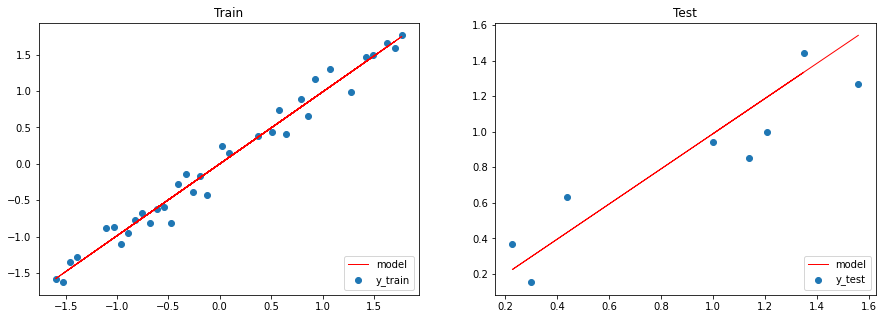

In [59]:
# Plotting the train and test data 

plt.figure(figsize = (15, 5))

# plot train data 
plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(X_train, y_train, label = "y_train")
plt.plot(X_train,pred_train, color = "red", linewidth = 1, linestyle = "-", label = "model")
plt.legend(loc = "lower right")

# plot test data
plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(X_test, y_test, label = "y_test")
plt.plot(X_test, pred_test, color = "red", linewidth = 1, linestyle = "-", label = "model")
plt.legend(loc = "lower right")

# Show plots 
plt.show()

In [60]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled * X_mean)

print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f} X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4 X + 9.4


In [61]:
## Pytorch Implementation 


In [62]:
# Importing the necessary libraries 

import torch

In [63]:
# Set seed for reproducibiity 
torch.manual_seed(SEED)

In [64]:
# Splitting data 
# - this time, instead of splitting the data with the indices, we will use scikit learns built in train_test_split fucntion 

from sklearn.model_selection import train_test_split

In [65]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [66]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = TRAIN_SIZE)

In [67]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
      f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 35 (0.70)
remaining: 15 (0.30)


In [68]:
# Split (test)

X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size = 0.5)

In [74]:
print (f"train: {len(X_train)} ({len(X_train) / len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val) / len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test) / len(X):.2f})")

train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


In [75]:
# Standardising the data 
# this time we wil use sklearns "StandardScaler" to standardise the data

from sklearn.preprocessing import StandardScaler

In [77]:
# Standardise the data (mean = 0, std = 1) using training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [78]:
# Apply scaler on the training and test data 

X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1,1)

X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1,1)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1,1)

In [79]:
# Check (means should be approx 0 and std should be approx 1)

print (f"mean: {np.mean(X_test, axis = 0)[0]:.1f}, std: {np.std(X_test, axis = 0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis = 0)[0]:.1f}, std: {np.std(y_test, axis = 0)[0]:.1f}")

mean: -0.2, std: 0.7
mean: -0.2, std: 0.7


In [80]:
# Weights 

from torch import nn 

In [81]:
# Inputs 
N = 3 # num samples 
x = torch.randn(N, INPUT_DIM)

print (x.shape)
print (x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [82]:
# Weights 

m = nn.Linear(INPUT_DIM, OUTPUT_DIM)

print (m)
print (f"weights ({m.weight.shape}): {m.weight[0][0]}")
print (f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.34761226177215576
bias (torch.Size([1])): -0.3370760679244995


In [83]:
# Forward pass 

z = m(x)
print (z.shape)
print (z.detach().numpy())

torch.Size([3, 1])
[[-0.32104054]
 [-0.19719592]
 [-0.68869597]]


In [84]:
# Model 

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.fcl = nn.Linear(input_dim, output_dim)

  def forward(self, x_in):
    y_pred = self.fcl(x_in)
    return y_pred

In [85]:
# Initialise model 

model = LinearRegression(input_dim = INPUT_DIM, output_dim = OUTPUT_DIM)
print (model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fcl): Linear(in_features=1, out_features=1, bias=True)
)>


In [86]:
# Loss 
# - this time we use the PyTorch's loss function specifically MSELoss

loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true = torch.Tensor([1., 1., 1., 0.])

loss = loss_fn(y_pred, y_true)
print ("Loss: ", loss.numpy())

Loss:  0.75


In [87]:
# Optimiser 

# - When we used NumPy to implement the Linear Regression earlier, we used the batch gradient descent to update the weights.

# -- but there are many different types of gradient descent optimisation algos to choose from

## -- the ADAM optimiser has become a standard algo for most cases

In [88]:
from torch.optim import Adam

In [89]:
# Optimiser 

optimiser = Adam(model.parameters(), lr = LEARNING_RATE)

In [90]:
# Training 
# - Convert data to tensors

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [91]:
# Training

for epoch in range(NUM_EPOCHS):

  # Forward pass 
  y_pred = model(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Zero all gradients
  optimiser.zero_grad()

  # Backward pass 
  loss.backward()

  # Update weights
  optimiser.step()

  if epoch%20 == 0:
    print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.22
Epoch: 20 | loss: 0.03
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.03
Epoch: 80 | loss: 0.03


In [92]:
# Evaluation 

# - Prediction 

pred_train = model(X_train)
pred_test = model(X_test)

In [93]:
# - Performance 

train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)

print (f"train_error: {train_error:.2f}")
print (f"test_error: {test_error:.2f}")

train_error: 0.03
test_error: 0.01


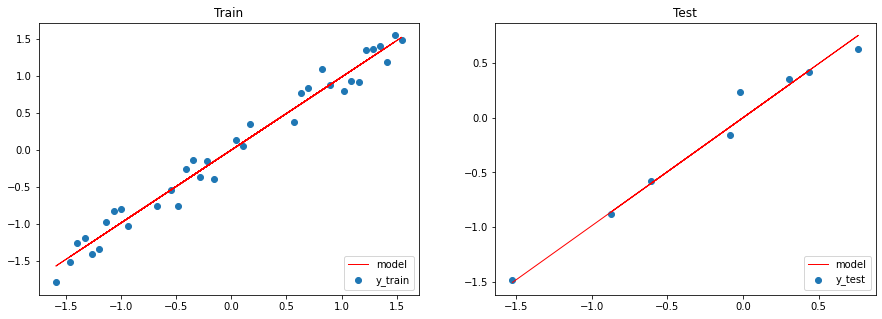

In [94]:
# Plotting the Training and test data 

# Figure size 
plt.figure(figsize = (15,5))

# Plot train data
plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(X_train, y_train, label = "y_train")
plt.plot(X_train, pred_train.detach().numpy(), color = "red", linewidth = 1, linestyle = "-", label = "model")
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(X_test, y_test, label = "y_test")
plt.plot(X_test, pred_test.detach().numpy(), color = "red", linewidth = 1, linestyle = "-", label = "model")
plt.legend(loc = "lower right")

# Show plots 
plt.show()

In [95]:
# Inference

# - After traing a model, we can use it to predict on new data 

# - Feed in your inputs

sample_indices = [10,15,25]

X_infer = np.array(sample_indices, dtype = np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1,1)))

In [98]:
# Unstandardise predictions

pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_

for i, index in enumerate(sample_indices):
  print (f"{df.iloc[index]['y']:.2f} (actual) -> {pred_infer[i][0]:.2f} (predicted)")

35.73 (actual) -> 41.28 (predicted)
59.34 (actual) -> 58.22 (predicted)
97.04 (actual) -> 92.09 (predicted)


In [99]:
# Interpretability 

# Linear regressions are highly interpretable
# Each feature has a coefficient that signifies its importance/impact on the output variable y. 
# We can interprete our coefficient as follows: by increasing X by 1 unit, we increase y by W(approx 3.65) units

In [101]:
# Unstandardise coefficient 

W = model.fcl.weight.data.numpy()[0][0]
b = model.fcl.bias.data.numpy() [0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled * X_scaler.mean_)

print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.4


In [103]:
# Regularisation 
# - Helps decrease overfitting 
# - there are many forms of regularisation but they all work to reduce overfitting the models
# - Here we implement "L2(ridge regression)" regularisation where we penalise the weights with high magnitudes by decaying them. 

# - Having weights with high magnitude will lead to preferential bias with the inputs and we want the model to work with all the inputs and not a select few

In [104]:
L2_LAMBDA = 1e-2

In [105]:
# Initialise model 
model = LinearRegression(input_dim = INPUT_DIM, output_dim = OUTPUT_DIM)

In [106]:
# Optimiser (w L2 regularisation)

optimiser = Adam(model.parameters(), lr = LEARNING_RATE, weight_decay = L2_LAMBDA)

In [107]:
# Training

for epoch in range(NUM_EPOCHS):

  # Forward pass 
  y_pred = model(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Zero all gradients
  optimiser.zero_grad()

  # Backward pass 
  loss.backward()

  # Update weights
  optimiser.step()

  if epoch%20 == 0:
    print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.63
Epoch: 20 | loss: 0.04
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.03
Epoch: 80 | loss: 0.03


In [108]:
# Predictions

pred_train = model(X_train)
pred_test = model(X_test)

In [110]:
# Performance 
## -- regularisation didnt make a difference in this example because the data is generated from a perfect linear equation
## -- for a large realistic data, regularisation can help the model generalise well

train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)

print (f"train_error: {train_error:.2f}")
print (f"test_error: {test_error:.2f}")

train_error: 0.03
test_error: 0.01
